In [1]:
# Calling Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb


In [2]:
#Calling Data 
data = pd.read_csv(r"D:\Visual Studio Code\ML\DataSet\IMDb Movies India.csv",encoding='latin1')
data.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
#Data Description
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [4]:
#Checking number of data which is not null in all data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
#Shape of Dataset
data.shape

(15509, 10)

In [6]:
#Checking null data
data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [8]:
data.drop(columns=['Name',"Actor 2","Actor 3"],inplace=True)
data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
2,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
4,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor


In [9]:
data.dropna(inplace=True)
data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave


In [10]:
data.shape

(5746, 7)

In [11]:
#Removing Dublicate Value
data.drop_duplicates()
data.shape

(5746, 7)

# Handaling the Data Columns

In [12]:
data['Year'].head()

1    (2019)
3    (2019)
5    (1997)
6    (2005)
8    (2012)
Name: Year, dtype: object

In [13]:
data['Year'].unique()

array(['(2019)', '(1997)', '(2005)', '(2012)', '(2014)', '(2004)',
       '(2016)', '(1991)', '(2018)', '(2010)', '(1958)', '(2021)',
       '(2017)', '(2009)', '(1993)', '(2002)', '(2008)', '(1994)',
       '(2007)', '(2003)', '(1998)', '(1979)', '(1974)', '(2015)',
       '(2006)', '(1981)', '(2020)', '(1985)', '(2013)', '(2011)',
       '(1988)', '(1987)', '(1996)', '(1999)', '(1973)', '(1968)',
       '(1982)', '(1977)', '(1950)', '(1969)', '(1948)', '(1990)',
       '(1989)', '(2001)', '(2000)', '(1953)', '(1978)', '(1963)',
       '(1992)', '(1976)', '(1984)', '(1986)', '(1966)', '(1975)',
       '(1980)', '(1967)', '(1970)', '(1952)', '(1972)', '(1971)',
       '(1964)', '(1954)', '(1962)', '(1957)', '(1965)', '(1995)',
       '(1956)', '(1955)', '(1936)', '(1983)', '(1951)', '(1961)',
       '(1959)', '(1949)', '(1960)', '(1946)', '(1940)', '(1945)',
       '(1938)', '(1941)', '(1942)', '(1935)', '(1937)', '(1947)',
       '(1931)', '(1933)', '(1943)', '(1944)', '(1932)', '(193

In [14]:
def handle_data(value):
    value = str(value).strip("()")
    return int(value)

data['Year'] = data["Year"].apply(handle_data)
data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave


In [15]:
data["Duration"].unique()

array(['109 min', '110 min', '147 min', '142 min', '82 min', '116 min',
       '96 min', '120 min', '161 min', '166 min', '102 min', '87 min',
       '132 min', '105 min', '146 min', '168 min', '158 min', '126 min',
       '94 min', '138 min', '124 min', '144 min', '157 min', '136 min',
       '107 min', '113 min', '80 min', '122 min', '149 min', '148 min',
       '130 min', '121 min', '188 min', '115 min', '103 min', '114 min',
       '170 min', '100 min', '99 min', '140 min', '128 min', '93 min',
       '125 min', '145 min', '75 min', '111 min', '134 min', '104 min',
       '92 min', '137 min', '127 min', '119 min', '135 min', '90 min',
       '150 min', '151 min', '95 min', '52 min', '89 min', '112 min',
       '143 min', '177 min', '117 min', '123 min', '72 min', '154 min',
       '175 min', '153 min', '78 min', '139 min', '133 min', '180 min',
       '46 min', '164 min', '162 min', '171 min', '160 min', '152 min',
       '163 min', '165 min', '141 min', '129 min', '156 min', '240 

In [16]:
def handle_Duration(value):
    value = str(value).split(' ')
    value = value[0]
    return int(value)
data['Duration'] = data["Duration"].apply(handle_Duration)
data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave


In [17]:
data['Genre'].unique()

array(['Drama', 'Comedy, Romance', 'Comedy, Drama, Musical',
       'Drama, Romance, War', 'Horror, Mystery, Thriller',
       'Action, Crime, Thriller', 'Horror', 'Horror, Romance, Thriller',
       'Comedy, Drama, Romance', 'Comedy, Drama', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Comedy, Horror', 'Drama, Horror, Mystery',
       'Action, Thriller', 'Action', 'Horror, Mystery, Romance',
       'Horror, Mystery', 'Drama, Horror, Romance',
       'Action, Drama, History', 'Action, Drama, War', 'Thriller',
       'Comedy', 'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'Drama, History', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Adventure, Drama', 'Comedy, Mystery, Thriller', 'Drama, Romance',
       'Crime, Thriller', 'Horror, Sci-Fi, Thriller',
       'Drama, Mystery, Thriller', 'Drama, Family, Musical',
       'Action, Comedy', 'Action, Adventure, Fantasy', 'Documentary',
       'Drama, Horro

In [18]:
def handle_genre(data , value):
    data['Genre1'] = data[value].str.split(',',expand = True)[0]
    data['Genre2'] = data[value].str.split(',',expand = True)[1]
    data['Genre3'] = data[value].str.split(',',expand = True)[2]
    return data

handle_genre(data,'Genre')

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Drama,None,None
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Comedy,Romance,None
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Comedy,Drama,Musical
6,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Drama,Romance,War
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Horror,Mystery,Thriller
...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Drama,None,None
15494,2001,153,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Biography,Drama,History
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Action,Crime,Drama
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Action,Drama,None


In [19]:
data.isna().sum()

Year           0
Duration       0
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Genre1         0
Genre2      1717
Genre3      3412
dtype: int64

In [20]:
Movie_data = data.fillna(0)
Movie_data.isna().sum()

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Genre1      0
Genre2      0
Genre3      0
dtype: int64

In [21]:
Movie_data.drop(columns='Genre',inplace=True)

In [22]:
Movie_data.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Drama,0,0
3,2019,110,4.4,35,Ovais Khan,Prateik,Comedy,Romance,0
5,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Comedy,Drama,Musical
6,2005,142,7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Drama,Romance,War
8,2012,82,5.6,326,Allyson Patel,Yash Dave,Horror,Mystery,Thriller


In [23]:
Movie_data['Votes'].head()

1        8
3       35
5      827
6    1,086
8      326
Name: Votes, dtype: object

In [24]:
def handle_Votes(value):
    value = str(value).replace(',','')
    return int(value)

Movie_data['Votes']=Movie_data['Votes'].apply(handle_Votes)

In [25]:
Movie_data.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Drama,0,0
3,2019,110,4.4,35,Ovais Khan,Prateik,Comedy,Romance,0
5,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Comedy,Drama,Musical
6,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Drama,Romance,War
8,2012,82,5.6,326,Allyson Patel,Yash Dave,Horror,Mystery,Thriller


# Feature Extraction

In [26]:
Movie_data['Movie_Age'] = 2024 - Movie_data['Year']
Movie_data['Movie_Age']

1         5
3         5
5        27
6        19
8        12
         ..
15493     9
15494    23
15503    35
15505    25
15508    26
Name: Movie_Age, Length: 5746, dtype: int64

In [27]:
# Director and Actor Popularity

Director_Count = Movie_data['Director'].value_counts()
Movie_data['Director_Popularity'] = Movie_data['Director'].map(Director_Count)

Actor_Count = Movie_data['Actor 1'].value_counts()
Movie_data['Actor_Popularity'] = Movie_data['Actor 1'].map(Actor_Count)

In [28]:
Movie_data['LogVotes'] = np.log1p(Movie_data['Votes'])
Movie_data['LogVotes']

1        2.197225
3        3.583519
5        6.719013
6        6.991177
8        5.789960
           ...   
15493    6.013715
15494    7.311218
15503    3.806662
15505    6.486161
15508    3.044522
Name: LogVotes, Length: 5746, dtype: float64

In [29]:
Movie_data.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3,Movie_Age,Director_Popularity,Actor_Popularity,LogVotes
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Drama,0,0,5,1,2,2.197225
3,2019,110,4.4,35,Ovais Khan,Prateik,Comedy,Romance,0,5,1,5,3.583519
5,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Comedy,Drama,Musical,27,15,18,6.719013
6,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Drama,Romance,War,19,6,20,6.991177
8,2012,82,5.6,326,Allyson Patel,Yash Dave,Horror,Mystery,Thriller,12,1,1,5.789960


# Visualization

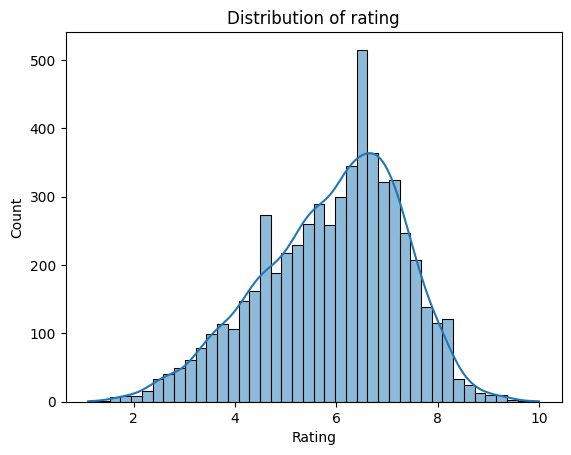

In [30]:
sns.histplot(data=Movie_data,x='Rating',kde=True)
plt.title('Distribution of rating')
plt.show()

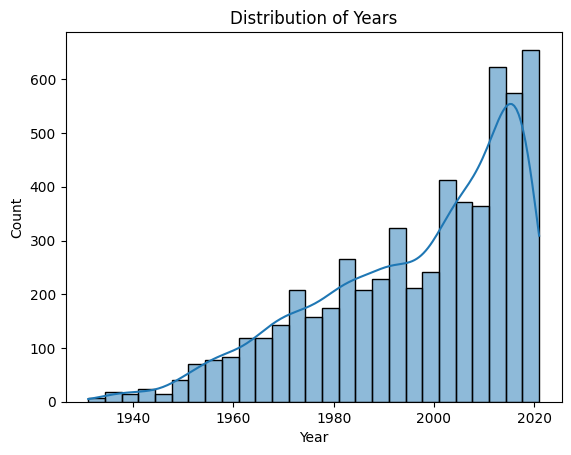

In [31]:
sns.histplot(data=Movie_data,x='Year',kde=True)
plt.title('Distribution of Years')
plt.show()

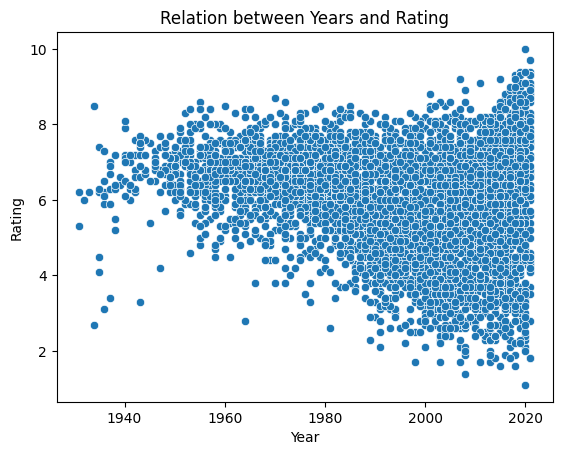

In [32]:
#Relation betweem Year and Rating
sns.scatterplot(data=Movie_data,x='Year',y='Rating')
plt.title('Relation between Years and Rating')
plt.show()

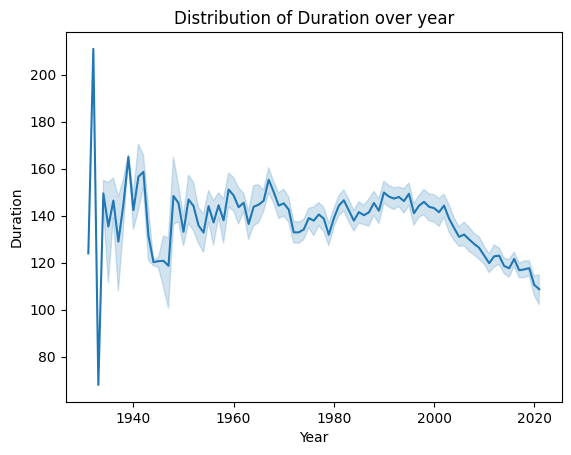

In [33]:
# Distribution of Duration over year
sns.lineplot(data=Movie_data,x='Year',y='Duration')
plt.title('Distribution of Duration over year')
plt.show()

In [34]:
Movie_data['Genre1 encoded'] =round(Movie_data.groupby('Genre1')['Rating'].transform('mean'),1)
Movie_data['Genre2 encoded']=round(Movie_data.groupby('Genre2')['Rating'].transform('mean'),1)
Movie_data['Genre3 encoded'] =round(Movie_data.groupby('Genre3')['Rating'].transform('mean'),1)
Movie_data['Votes encoded'] =round(Movie_data.groupby('Votes')['Rating'].transform('mean'), 1)
Movie_data['Director encoded']= round(Movie_data.groupby('Director')['Rating'].transform('mean'), 1)
Movie_data['Actor 1 encoded']= round(Movie_data.groupby('Actor 1')['Rating'].transform('mean'), 1)

In [35]:
Movie_data.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3,Movie_Age,Director_Popularity,Actor_Popularity,LogVotes,Genre1 encoded,Genre2 encoded,Genre3 encoded,Votes encoded,Director encoded,Actor 1 encoded
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Drama,0,0,5,1,2,2.197225,6.3,6.0,6.0,5.6,7.0,6.8
3,2019,110,4.4,35,Ovais Khan,Prateik,Comedy,Romance,0,5,1,5,3.583519,5.8,5.9,6.0,5.7,4.4,5.4
5,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Comedy,Drama,Musical,27,15,18,6.719013,5.8,5.9,6.0,4.8,5.3,4.8
6,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Drama,Romance,War,19,6,20,6.991177,6.3,5.9,6.3,7.4,7.4,5.4
8,2012,82,5.6,326,Allyson Patel,Yash Dave,Horror,Mystery,Thriller,12,1,1,5.789960,4.7,5.7,5.7,6.6,5.6,5.6


In [36]:
Movie_data.drop(columns=['Year','Actor 1','Genre2' ,'Genre3','Genre1','Director'],inplace=True)


In [37]:
Movie_data.head()

,Duration,Rating,Votes,Movie_Age,Director_Popularity,Actor_Popularity,LogVotes,Genre1 encoded,Genre2 encoded,Genre3 encoded,Votes encoded,Director encoded,Actor 1 encoded
1,109,7.0,8,5,1,2,2.197225,6.3,6.0,6.0,5.6,7.0,6.8
3,110,4.4,35,5,1,5,3.583519,5.8,5.9,6.0,5.7,4.4,5.4
5,147,4.7,827,27,15,18,6.719013,5.8,5.9,6.0,4.8,5.3,4.8
6,142,7.4,1086,19,6,20,6.991177,6.3,5.9,6.3,7.4,7.4,5.4
8,82,5.6,326,12,1,1,5.789960,4.7,5.7,5.7,6.6,5.6,5.6


In [38]:
std = StandardScaler()

# Reshape the data to 2D
Movie_data['Duration'] = std.fit_transform(Movie_data[['Duration']])
Movie_data['Votes'] = std.fit_transform(Movie_data[['Votes']])


# Traning Data

In [39]:
x = Movie_data.drop('Rating',axis=1)
y= Movie_data['Rating']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

Linear Regression

In [40]:
#initialaze the model
model = LinearRegression()
#Fitting the Training Data
model.fit(x_train,y_train)

LinearRegression()

In [41]:
# Check the predicted value in test Data
test_pred = model.predict(x_test)
mse = mean_squared_error(y_test,test_pred)
print(f"Mean Square Error (MSE): {mse:.2f}")

r2 = r2_score(y_test,test_pred)
print(f"Root Square(r2): {r2:.2f}")


Mean Square Error (MSE): 0.42
Root Square(r2): 0.76


Decision Trees

In [42]:
model_DT = DecisionTreeRegressor(random_state=42)
model_DT.fit(x_train, y_train)
test_pred = model_DT.predict(x_test)

mean_DT = mean_squared_error(y_test,test_pred)
print(f"Mean Square Error (MSE): {mse:.2f}")

r2 = r2_score(y_test,test_pred)
print(f"Root Square(r2): {r2:.2f}")

Mean Square Error (MSE): 0.42
Root Square(r2): 0.66


Random Forest

In [43]:
model_RF = RandomForestRegressor(n_estimators=200,random_state=42)
model_RF.fit(x_train,y_train)
test_pred = model_RF.predict(x_test)

mean_DT = mean_squared_error(y_test,test_pred)
print(f"Mean Square Error (MSE): {mse:.2f}")

r2 = r2_score(y_test,test_pred)
print(f"Root Square(r2): {r2:.2f}")


Mean Square Error (MSE): 0.42
Root Square(r2): 0.81


Support Vector Machine (SVR)

In [44]:
model_SVR = SVR(kernel='linear',gamma='scale',epsilon=0.1,C=1.0)
model_SVR.fit(x_train,y_train)
test_pred = model_SVR.predict(x_test)

mean_DT = mean_squared_error(y_test,test_pred)
print(f"Mean Square Error (MSE): {mse:.2f}")

r2 = r2_score(y_test,test_pred)
print(f"Root Square(r2): {r2:.2f}")

Mean Square Error (MSE): 0.42
Root Square(r2): 0.76


XGBoost 

In [45]:
xgb_boost = xgb.XGBRegressor(n_estimators =200)
xgb_boost.fit(x_train, y_train)
test_pred = xgb_boost.predict(x_test)

mean_DT = mean_squared_error(y_test,test_pred)
print(f"Mean Square Error (MSE): {mse:.2f}")

r2 = r2_score(y_test,test_pred)
print(f"Root Square(r2): {r2:.2f}")

Mean Square Error (MSE): 0.42
Root Square(r2): 0.81
